## Imports + Data Initialization

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from math import e
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


## Standardization

In [4]:
# Excluding famhist and chd columns
cols_to_norm = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

# Standardization using sklearns StandardScaler module
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,1.058564,1.823073,0.478412,-0.295503,Present,-0.418470,-0.176786,3.277738,0.629336,1
1,2,0.277089,-0.790237,-0.159680,0.412140,Absent,0.193344,0.671373,-0.612745,1.383115,1
2,3,-0.992806,-0.774980,-0.609245,0.884332,Present,-0.112563,0.735519,-0.541183,0.218184,0
3,4,1.546985,0.842264,0.807126,1.624141,Present,-0.214532,1.412621,0.295062,1.040488,1
4,5,-0.211332,2.171805,-0.599577,0.305351,Present,0.703189,-0.012856,1.647775,0.423760,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,3.696039,-0.705234,0.599263,0.812281,Absent,1.111065,0.571590,-0.696983,1.040488,0
458,460,2.133091,0.123004,-0.159680,0.861173,Absent,-0.112563,0.609602,0.068519,0.629336,1
459,461,-1.481228,-0.138545,-1.522877,-1.309364,Absent,-1.336191,-1.414575,0.392385,0.834912,0
460,462,-0.992806,0.384553,3.320823,0.692625,Absent,1.111065,0.310252,0.283203,-0.192969,0


## One-Hot-Encoding + EDA

Percent class 0: 65.36796536796537 
Percent class 1: 34.63203463203463 
Missing values: 0


Text(0.5, 1.0, 'Correlation Matrix')

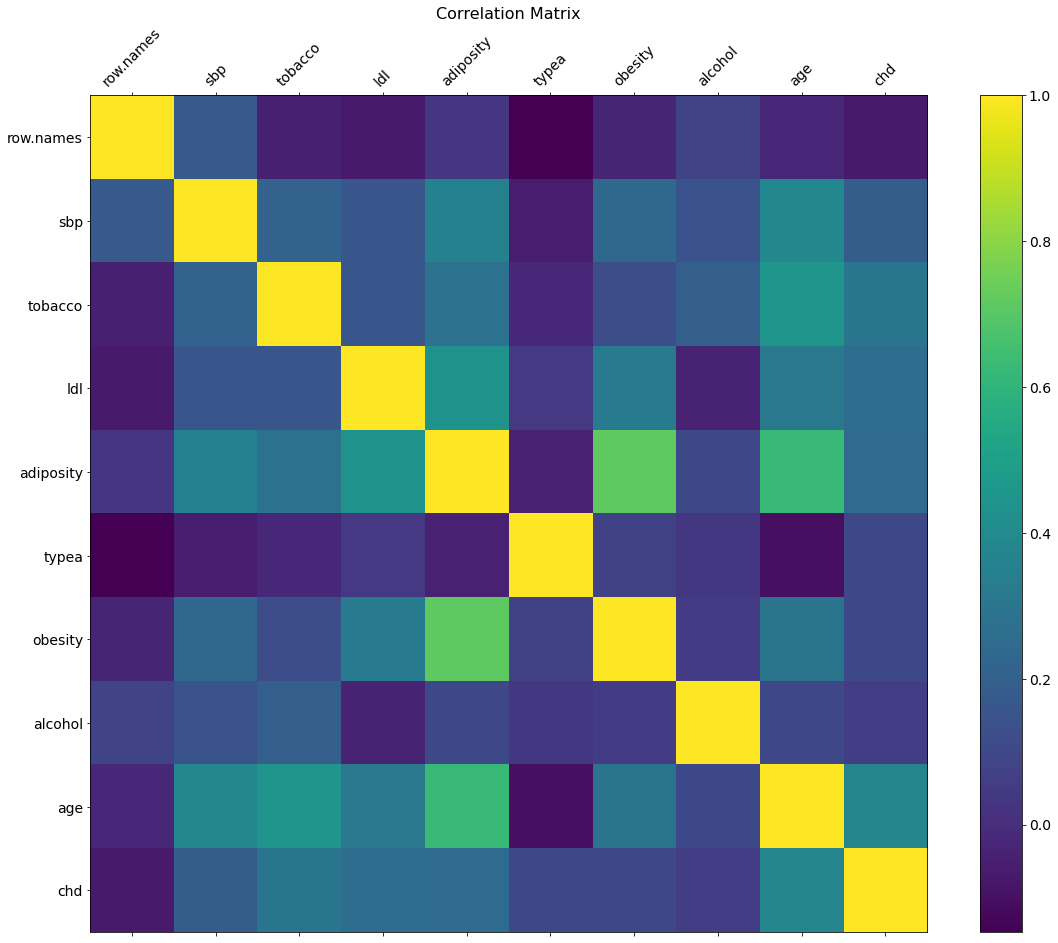

In [6]:
data = df.to_numpy()

class0 = 0
class1 = 0
missing = 0

# Count classes and convert categorical variables to numerical
for row in data:
    if row[5] == 'Present':
        row[5] = 1
    if row[5] == 'Absent':
        row[5] = 0
    if row[10] == 1:
        class1 += 1 
    if row[10] == 0:
        class0 += 1    
    for i in range(len(row)):
        if row[i] == 'nan' or row[i] == '':
            missing += 1
    row[0] = 1

# Class Percentage Calculations
percent_class0 = class0/len(data) * 100
percent_class1 = class1/len(data) * 100
print(f'Percent class 0: {percent_class0} \nPercent class 1: {percent_class1} \nMissing values: {missing}')

# Correlation Matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

## Theta Initialization

In [167]:
theta = [random.uniform(0, 1) for i in range(10)]
theta = np.array(theta)
theta1 = theta.copy()
theta2 = theta.copy()
theta3 = theta.copy()
theta4 = theta.copy()
theta5 = theta.copy()
theta6 = theta.copy()

theta7 = theta.copy()
theta8 = theta.copy()
theta9 = theta.copy()
theta10 = theta.copy()
theta11 = theta.copy()
theta12 = theta.copy()

theta13 = theta.copy()
theta14 = theta.copy()
theta15 = theta.copy()
theta16 = theta.copy()
theta17 = theta.copy()
theta18 = theta.copy()

theta

array([0.68185258, 0.0632683 , 0.20414459, 0.76805071, 0.81046726,
       0.50612641, 0.45449869, 0.13846903, 0.89960596, 0.15900686])

## Hypothesis Model

In [168]:
def hypothesis(theta):
    # Temp array to store values of hypothesis
    temp = []

    # Calculating hypopthesis for each row based off of random thetas
    for row in data:
        z = np.dot(theta.T, row[:-1])
        temp.append(1 / (1 + e**(-z)))
    
    # Converting temp to a numpy array
    h = np.array(temp)
    return h

## Cost Function

In [169]:
def cost(theta):
    J = 0
    sigmoid = hypothesis(theta)
    for i in range(len(data)):
        J += (data[i][10]*np.log(sigmoid[i]) + (1-data[i][10])*np.log(1-sigmoid[i]))
    return -(J)/len(data)

## Gradient Descents + Updates

In [1]:
def gradient_descent(theta, a, epochs, batch=len(data)):
    costs = []
    print(theta)
    for _ in range(epochs):
        pos = 0
        remainder = len(data) % batch
        sigmoid = hypothesis(theta)
        
        while pos+batch <= len(data):
            for i in range(len(data[0])-1):
                summation = 0
                for j in range(pos, pos+batch):
                    summation += ((data[j][10]-sigmoid[j]) * data[j][i])
                theta[i] = theta[i] + (a/batch * summation)
            pos += batch
        
        if 0 < pos < len(data):
            for i in range(len(data[0])-1):
                summation = 0
                for j in range(pos, pos+remainder):
                    summation += ((data[j][10]-sigmoid[j]) * data[j][i])
                theta[i] = theta[i] + (a/remainder * summation)      
 
        costs.append(cost(theta))
            
    return costs

def stochastic_gradient_descent(theta, a, epochs):
    costs = []
    for _ in range(epochs):
        sigmoid = hypothesis(theta)
        rand = random.randrange(0, 461)
        for i in range(len(data[0])-1):
            theta[i] = theta[i] + a*(data[rand][10]-sigmoid[rand]) * data[rand][i]
        costs.append(cost(theta))
        
    return costs

NameError: name 'data' is not defined

## Batch Gradient Descent Plots

[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.8717661711228955
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.9302626956616646
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.8145878313174784
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.9234340387690552
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.5353548044911971
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.8145940707898779


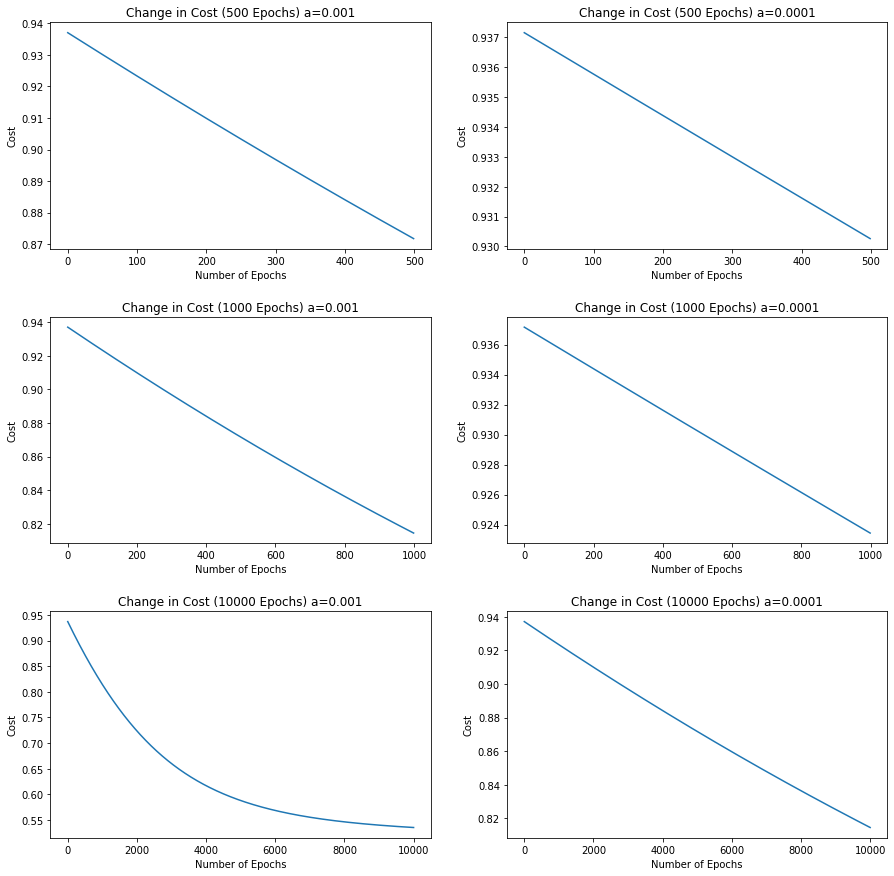

In [171]:
%matplotlib inline
# Create four subplots in a 2 by 2 area
fig, pos = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

costs = gradient_descent(theta1, 0.001, 500)
print(costs[-1])

# Row 0 Left: Cost vs 500 Epochs with a=0.001
pos[0, 0].set_title(f'Change in Cost (500 Epochs) a=0.001')
pos[0, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 0].plot(range(500), costs)

costs = gradient_descent(theta2, 0.0001, 500)
print(costs[-1])

# Row 0 Right: Cost vs 500 Epochs with a=0.0001
pos[0, 1].set_title(f'Change in Cost (500 Epochs) a=0.0001')
pos[0, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 1].plot(range(500), costs)

costs = gradient_descent(theta3, 0.001, 1000)
print(costs[-1])

# Row 1 Left: Cost vs 1000 Epochs with a=0.001
pos[1, 0].set_title(f'Change in Cost (1000 Epochs) a=0.001')
pos[1, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 0].plot(range(1000), costs)

costs = gradient_descent(theta4, 0.0001, 1000)
print(costs[-1])

# Row 1 Right: Cost vs 1000 Epochs with a=0.0001
pos[1, 1].set_title(f'Change in Cost (1000 Epochs) a=0.0001')
pos[1, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 1].plot(range(1000), costs)

costs = gradient_descent(theta5, 0.001, 10000)
print(costs[-1])

# Row 2 Left: Cost vs 10000 Epochs with a=0.001
pos[2, 0].set_title(f'Change in Cost (10000 Epochs) a=0.001')
pos[2, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 0].plot(range(10000), costs)

costs = gradient_descent(theta6, 0.0001, 10000)
print(costs[-1])

# Row 2 Right: Cost vs 10000 Epochs with a=0.0001
pos[2, 1].set_title(f'Change in Cost (10000 Epochs) a=0.0001')
pos[2, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 1].plot(range(10000), costs)

## Mini-batch Gradient Descent Plots

[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.5975953175775728
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.8764477311983073
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.5387023462305822
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.8227540811047449
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.5110430370336524
[0.68185258 0.0632683  0.20414459 0.76805071 0.81046726 0.50612641
 0.45449869 0.13846903 0.89960596 0.15900686]
0.5387263424023357


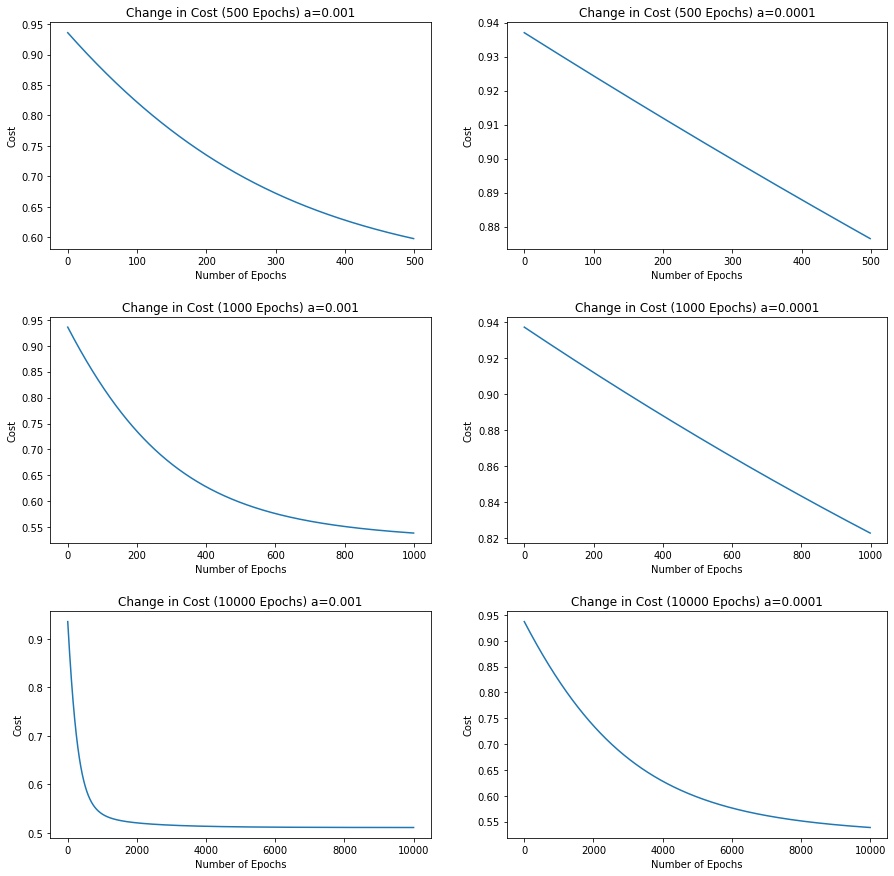

In [172]:
%matplotlib inline
# Create four subplots in a 2 by 2 area
fig, pos = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

costs = gradient_descent(theta7, 0.001, 500, 50)
print(costs[-1])

# Row 0 Left: Cost vs 500 Epochs with a=0.001
pos[0, 0].set_title(f'Change in Cost (500 Epochs) a=0.001')
pos[0, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 0].plot(range(500), costs)

costs = gradient_descent(theta8, 0.0001, 500, 50)
print(costs[-1])

# Row 0 Right: Cost vs 500 Epochs with a=0.0001
pos[0, 1].set_title(f'Change in Cost (500 Epochs) a=0.0001')
pos[0, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 1].plot(range(500), costs)

costs = gradient_descent(theta9, 0.001, 1000, 50)
print(costs[-1])

# Row 1 Left: Cost vs 1000 Epochs with a=0.001
pos[1, 0].set_title(f'Change in Cost (1000 Epochs) a=0.001')
pos[1, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 0].plot(range(1000), costs)

costs = gradient_descent(theta10, 0.0001, 1000, 50)
print(costs[-1])

# Row 1 Right: Cost vs 1000 Epochs with a=0.0001
pos[1, 1].set_title(f'Change in Cost (1000 Epochs) a=0.0001')
pos[1, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 1].plot(range(1000), costs)

costs = gradient_descent(theta11, 0.001, 10000, 50)
print(costs[-1])

# Row 2 Left: Cost vs 10000 Epochs with a=0.001
pos[2, 0].set_title(f'Change in Cost (10000 Epochs) a=0.001')
pos[2, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 0].plot(range(10000), costs)

costs = gradient_descent(theta12, 0.0001, 10000, 50)
print(costs[-1])

# Row 2 Right: Cost vs 10000 Epochs with a=0.0001
pos[2, 1].set_title(f'Change in Cost (10000 Epochs) a=0.0001')
pos[2, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 1].plot(range(10000), costs)

## Stochastic Gradient Descent Plots

1.4164863997058081
1.1212328057198513
1.2996109455959648
2.228156754067548
0.9084717572757328
1.9138373567622993


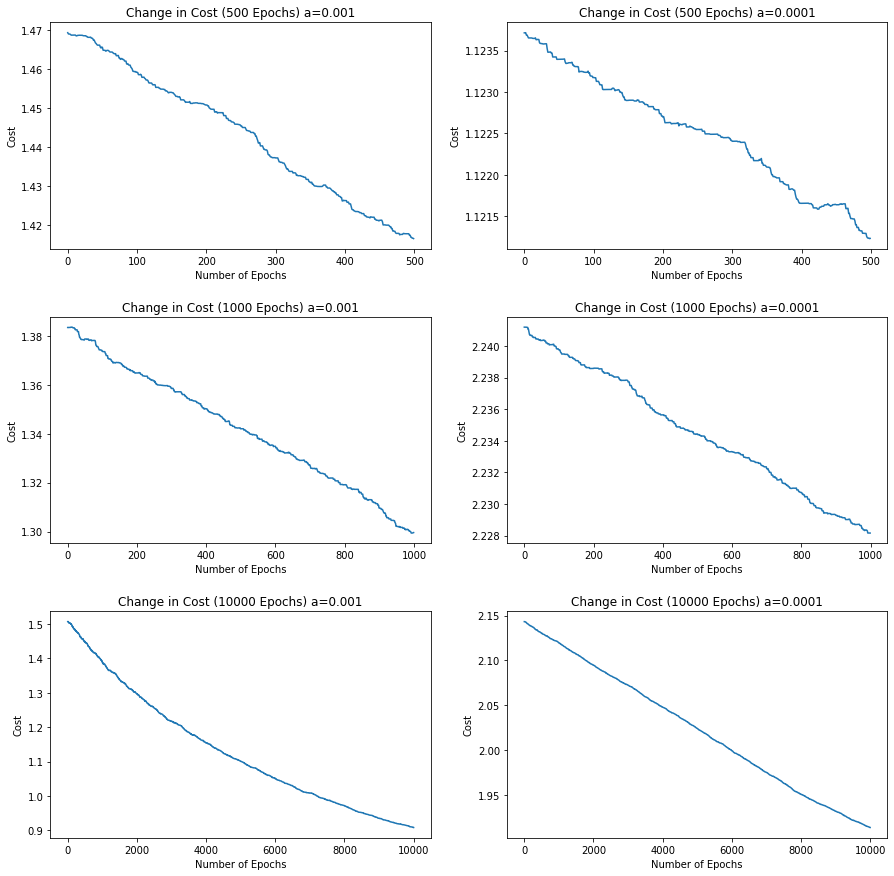

In [194]:
%matplotlib inline
# Create four subplots in a 2 by 2 area
fig, pos = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

costs = stochastic_gradient_descent(theta13, 0.001, 500)
print(costs[-1])

# Row 0 Left: Cost vs 500 Epochs with a=0.001
pos[0, 0].set_title(f'Change in Cost (500 Epochs) a=0.001')
pos[0, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 0].plot(range(500), costs)

costs = stochastic_gradient_descent(theta14, 0.0001, 500)
print(costs[-1])

# Row 0 Right: Cost vs 500 Epochs with a=0.0001
pos[0, 1].set_title(f'Change in Cost (500 Epochs) a=0.0001')
pos[0, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 1].plot(range(500), costs)

costs = stochastic_gradient_descent(theta15, 0.001, 1000)
print(costs[-1])

# Row 1 Left: Cost vs 1000 Epochs with a=0.001
pos[1, 0].set_title(f'Change in Cost (1000 Epochs) a=0.001')
pos[1, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 0].plot(range(1000), costs)

costs = stochastic_gradient_descent(theta16, 0.0001, 1000)
print(costs[-1])

# Row 1 Right: Cost vs 1000 Epochs with a=0.0001
pos[1, 1].set_title(f'Change in Cost (1000 Epochs) a=0.0001')
pos[1, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 1].plot(range(1000), costs)

costs = stochastic_gradient_descent(theta17, 0.001, 10000)
print(costs[-1])

# Row 2 Left: Cost vs 10000 Epochs with a=0.001
pos[2, 0].set_title(f'Change in Cost (10000 Epochs) a=0.001')
pos[2, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 0].plot(range(10000), costs)

costs = stochastic_gradient_descent(theta18, 0.0001, 10000)
print(costs[-1])

# Row 2 Right: Cost vs 10000 Epochs with a=0.0001
pos[2, 1].set_title(f'Change in Cost (10000 Epochs) a=0.0001')
pos[2, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 1].plot(range(10000), costs)

## Sklearn Logistic Regression

In [191]:
features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
x = df[features]
x = pd.get_dummies(x)
y = df['chd']

LogReg.score(x, y)

0.7316017316017316